In [1]:
import numpy as np
from grand.simu.noise.galaxy import galaxy_radio_signal

from matplotlib import pyplot as plt
params = {
    "legend.fontsize": 14,
    "axes.labelsize": 22,
    "axes.titlesize": 23,
    "xtick.labelsize": 20,
    "ytick.labelsize": 20,
    "figure.figsize": (8, 6),
    "axes.grid": False,
}
plt.rcParams.update(params)

freq_MHz = np.arange(30, 251, 1)


Galactic noise at LST 18h.
Galactic noise at LST 17h.


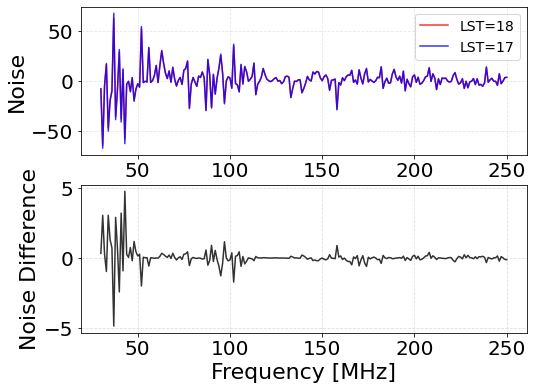

In [2]:
# Note: noise_file
#       noise_file = h5py.File("grand/data/model/sky/30_250galactic.mat")
#       noise_file.keys() = ['freq_all', 'p_narrow', 'p_narrow_huatu', 'psd_narrow_huatu', 'v_amplitude']

# galaxy_radio_signal(f_lst, size_out, freqs_mhz, nb_ant, show_flag=False)
lst      = 18 # input is float. It will be converted to int.
size_out = 20
freq_MHz = np.arange(30, 251, 1)
nb_ant   = 300
idx_du   = 44
seed     = 0  # If you want to generate the same random numbers for galactic noise. 'None' means seed is not used.

print("Galactic noise at LST 18h.")
fft_noise_gal_3d_lst18 = galaxy_radio_signal(lst, size_out, freq_MHz, nb_ant, seed)

print("Galactic noise at LST 17h.")
fft_noise_gal_3d_lst17 = galaxy_radio_signal(17, size_out, freq_MHz, nb_ant, seed)

noise_lst18 = np.real(fft_noise_gal_3d_lst18)[idx_du,0,:]    # real value for du_indx=44
noise_lst17 = np.real(fft_noise_gal_3d_lst17)[idx_du,0,:]
noise_diff = noise_lst18 - noise_lst17

plt.figure()
plt.subplot(211)
plt.plot(freq_MHz, noise_lst18, label="LST=18", color='r', alpha=0.8)
plt.plot(freq_MHz, noise_lst17, label="LST=17", color='b', alpha=0.8)
plt.ylabel("Noise")
plt.legend()
plt.grid(ls='--', alpha=0.3)

plt.subplot(212)
plt.plot(freq_MHz, noise_diff, color='k', alpha=0.8)
plt.xlabel("Frequency [MHz]")
plt.ylabel("Noise Difference")
plt.grid(ls="--", alpha=0.4)
plt.show()